일반적으로 각 패캐지는 pd,np,plt라는 이름으로 불러옵니다.

In [ ]:
import pandas as pd


In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터프레임을 만듭니다.

In [ ]:
dates = pd.date_range('20130101', periods=6)



DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.194410,0.121056,0.605077,-0.280678
2013-01-02,-1.718574,0.414487,-1.069257,1.509118
2013-01-03,-1.119921,1.280441,2.158715,-0.043198
2013-01-04,-0.013501,0.678404,0.293569,-0.922581
2013-01-05,0.510088,-0.067553,0.671222,-0.521168
2013-01-06,-1.230430,-0.175668,0.395325,1.107810


series와 같은 것으로 변환될 수 있는 객체들의 dict로 구성된 데이터프레임을 만듭니다.

In [ ]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


데이터프레임 결과물의 열은 다양한 데이터타입 (dtypes)으로 구성됩니다.


In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

ipython을 이용하고 계시다면(공용 속성을 포함한) 열 이름에 대한 tap 자동완성 기능이 자동으로 활성화 됩니다, 다음은 완성될 속성에 대한 부분집합(subset)입니다.


역자주 :아래 제시된 코드의 경우, iPython이 아닌 환경(Google Colaboratory, Juoyter 등)에서는 사용이 불가능한 코드인 점에 주의하세요.

In [ ]:
# df2.<TAB>

2. Viewing Data (데이터 확인하기)


Basic Section을 참조하세요.

데이터프레임의 가장 윗 줄과 마지막 줄을 확인하고 싶을 때에 사용하는 방법은 다음과 같습니다.

역자 주: 괄호() 안에는 숫자가 들어갈 수도 있고 안 들어갈 수도 있습니다. 숫자가 들어간다면, 윗 / 마지막 줄의 특정 줄을 불러올 수 있습니다. 숫자가 들어가지 않다면, 기본값인 5로 처리됩니다.

예시

In [ ]:
df.tail(3) # 끝에서 마지막 3줄을 불러옴
df.tail()  # 끝에서 마지막 5중르 불러옴

df.head()


,A,B,C,D
2013-01-01,0.194410,0.121056,0.605077,-0.280678
2013-01-02,-1.718574,0.414487,-1.069257,1.509118
2013-01-03,-1.119921,1.280441,2.158715,-0.043198
2013-01-04,-0.013501,0.678404,0.293569,-0.922581
2013-01-05,0.510088,-0.067553,0.671222,-0.521168


In [ ]:
df.tail(3)


,A,B,C,D
2013-01-04,-0.013501,0.678404,0.293569,-0.922581
2013-01-05,0.510088,-0.067553,0.671222,-0.521168
2013-01-06,-1.230430,-0.175668,0.395325,1.107810


인덱스(index), 열(column) 그리고 numpy 데이터에 대한 세부 정보를 봅니다.


In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.values

array([[ 0.19440965,  0.12105647,  0.60507694, -0.28067799],
       [-1.71857419,  0.4144867 , -1.06925745,  1.50911777],
       [-1.11992105,  1.28044147,  2.1587148 , -0.04319846],
       [-0.01350082,  0.67840392,  0.29356863, -0.92258135],
       [ 0.51008767, -0.06755282,  0.67122177, -0.52116846],
       [-1.23043047, -0.17566823,  0.39532528,  1.10781011]])

describe()는 데이터의 대략적인 통계적 정보 요약을 보여줍니다.

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.562988,0.375195,0.509108,0.141550
std,0.907536,0.543510,1.030275,0.957902
min,-1.718574,-0.175668,-1.069257,-0.922581
25%,-1.202803,-0.020400,0.319008,-0.461046
50%,-0.566711,0.267772,0.500201,-0.161938
75%,0.142432,0.612425,0.654686,0.820058
max,0.510088,1.280441,2.158715,1.509118


축 별로 정렬합니다.

데이터를 전치합니다.

In [137]:
df.T

,2000-01-01,2000-01-02,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07,2000-01-08,2000-01-09,2000-01-10,2000-01-11,2000-01-12,2000-01-13,2000-01-14,2000-01-15,2000-01-16,2000-01-17,2000-01-18,2000-01-19,2000-01-20,2000-01-21,2000-01-22,2000-01-23,2000-01-24,2000-01-25,2000-01-26,2000-01-27,2000-01-28,2000-01-29,2000-01-30,2000-01-31,2000-02-01,2000-02-02,2000-02-03,2000-02-04,2000-02-05,2000-02-06,2000-02-07,2000-02-08,2000-02-09,...,2002-08-18,2002-08-19,2002-08-20,2002-08-21,2002-08-22,2002-08-23,2002-08-24,2002-08-25,2002-08-26,2002-08-27,2002-08-28,2002-08-29,2002-08-30,2002-08-31,2002-09-01,2002-09-02,2002-09-03,2002-09-04,2002-09-05,2002-09-06,2002-09-07,2002-09-08,2002-09-09,2002-09-10,2002-09-11,2002-09-12,2002-09-13,2002-09-14,2002-09-15,2002-09-16,2002-09-17,2002-09-18,2002-09-19,2002-09-20,2002-09-21,2002-09-22,2002-09-23,2002-09-24,2002-09-25,2002-09-26
A,0.280353,-1.089355,-1.281490,-0.139539,-1.304498,-0.426005,-0.352535,0.618766,0.670575,0.950605,0.710204,0.745780,0.890783,-0.418436,-1.356375,-0.248237,-3.018162,-3.243624,-3.547542,-3.788419,-2.638557,-1.635766,0.709647,2.007808,2.544183,2.966512,3.076038,3.304551,2.983755,2.488460,2.350618,4.030657,3.568770,3.616490,3.215963,3.002183,4.508561,4.812830,5.305472,5.202707,...,21.718138,23.751031,22.959471,23.975053,22.478472,23.533818,24.495161,25.658659,25.745232,26.352025,26.937397,26.530066,24.151473,25.107589,24.647068,25.039945,24.518255,25.497215,25.350343,25.875312,25.080011,24.675983,23.666062,22.568480,23.115090,21.446472,20.332600,20.986947,20.525418,20.530840,19.808840,19.423558,17.395093,18.688758,20.744602,22.347220,21.936443,22.154637,23.114169,22.300030
B,1.296893,2.847020,2.852504,3.617231,3.649817,3.196368,3.873090,3.735412,3.053499,3.747156,2.941691,1.633961,1.272839,2.671194,2.258448,1.859584,2.177596,2.472521,2.085551,3.178242,3.990413,3.209243,2.909833,2.953295,4.292261,5.379284,5.794625,5.350584,5.986800,8.119934,8.505884,7.435859,7.926210,6.212781,5.584810,4.851334,4.475860,3.988038,4.345505,3.502859,...,18.286614,16.196244,15.110316,15.798372,14.961688,16.132605,15.868768,15.920336,14.375831,12.878878,13.730678,13.842113,14.330895,13.339800,13.778941,14.299954,13.528189,12.924052,12.974457,13.575532,12.833249,11.212887,10.998183,9.621573,7.026658,6.442208,6.758216,5.301073,5.620807,3.761053,2.503068,1.959570,2.319982,2.588816,3.499011,2.491960,1.604322,0.961829,-0.047867,-1.369450
C,-1.097626,-1.863945,-2.745883,-2.739149,-1.981081,-2.981278,-4.152758,-5.138968,-4.391257,-3.452069,-3.639681,-4.773260,-5.346908,-5.351098,-5.122650,-6.438253,-6.358193,-5.402117,-4.846769,-4.343147,-4.162444,-3.030663,-3.613069,-4.358178,-5.623767,-5.797887,-7.247136,-6.965390,-6.968596,-6.175723,-6.185779,-7.743011,-6.856696,-5.976730,-6.300570,-7.381584,-7.140689,-6.537160,-6.296318,-6.875144,...,60.670070,61.147826,60.732499,59.044951,60.384815,62.140510,61.153133,61.743508,62.611775,63.314422,63.601079,64.427206,62.961413,62.735520,63.691141,64.041031,64.364653,64.736152,64.165030,63.491954,63.613659,63.624532,62.123101,62.065376,62.363569,61.772100,61.838397,61.784562,61.691713,59.899992,61.202667,60.639685,61.195328,63.158920,63.167836,65.458653,66.379792,63.980942,63.231008,61.688241
D,0.768056,1.719845,1.945448,0.906859,1.387088,0.027732,-0.039092,-0.359943,0.651364,0.503580,-0.733038,0.254961,1.315699,1.292356,2.608023,2.170787,2.519770,4.682775,3.934196,6.754604,7.262403,7.525512,6.836525,7.491718,7.929934,6.646745,7.338339,7.314863,7.446202,6.464945,7.849607,6.801546,6.634883,7.404683,7.544519,7.244643,6.490613,6.336169,6.320106,4.740489,...,20.480634,21.204579,22.231309,22.359975,23.160157,21.124535,21.511923,22.442511,20.889240,20.960025,20.564279,19.205392,18.887180,19.925781,21.442772,21.272023,21.152595,20.836373,20.125997,21.039974,20.810115,20.127476,20.392711,21.135953,20.903940,19.269639,17.702188,18.685570,17.557568,19.186799,19.470451,19.098949,19.130309,19.687573,19.367319,20.122744,20.702678,20.804868,20.532317,20.040329


축 별로 정렬합니다/\.

In [ ]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.280678,0.605077,0.121056,0.194410
2013-01-02,1.509118,-1.069257,0.414487,-1.718574
2013-01-03,-0.043198,2.158715,1.280441,-1.119921
2013-01-04,-0.922581,0.293569,0.678404,-0.013501
2013-01-05,-0.521168,0.671222,-0.067553,0.510088
2013-01-06,1.107810,0.395325,-0.175668,-1.230430


값 별로 정렬합니다.

In [ ]:
df.sort_values(by= 'B')

,A,B,C,D
2013-01-06,-1.230430,-0.175668,0.395325,1.107810
2013-01-05,0.510088,-0.067553,0.671222,-0.521168
2013-01-01,0.194410,0.121056,0.605077,-0.280678
2013-01-02,-1.718574,0.414487,-1.069257,1.509118
2013-01-04,-0.013501,0.678404,0.293569,-0.922581
2013-01-03,-1.119921,1.280441,2.158715,-0.043198


3. Selection(선택)

주석(Note): 선택과 설정을 위한 Python/Numpy의 표준화된 표현들이 직관적이며,코드 작성을 위한 양방향 작업에 유용하지만 우리는 pandasd에 죄적화된 데이터 접근 방법인 .at,.iat,.loc 및 .iloc을 추천합니다.



Getting(데이터 얻기)

df.A와 동일한 Series를 생성하는 단일 열을 선택합니다.

In [ ]:
df['A']

2013-01-01    0.194410
2013-01-02   -1.718574
2013-01-03   -1.119921
2013-01-04   -0.013501
2013-01-05    0.510088
2013-01-06   -1.230430
Freq: D, Name: A, dtype: float64

행을 분할하는 []를 통해 선택합니다.

In [ ]:
df[0:3]

,A,B,C,D
2013-01-01,0.194410,0.121056,0.605077,-0.280678
2013-01-02,-1.718574,0.414487,-1.069257,1.509118
2013-01-03,-1.119921,1.280441,2.158715,-0.043198


In [ ]:
df['20130102' : '20130104']

,A,B,C,D
2013-01-02,-1.718574,0.414487,-1.069257,1.509118
2013-01-03,-1.119921,1.280441,2.158715,-0.043198
2013-01-04,-0.013501,0.678404,0.293569,-0.922581


selection by Label (Label 을 통한 선택)

Label을 통한 선택에서 더 많은 내용을 확인하세요.

라벨을 사용하여 횡단면을 얻습니다.

In [36]:
df.loc[dates[0]]

A    0.194410
B    0.121056
C    0.605077
D   -0.280678
Name: 2013-01-01 00:00:00, dtype: float64

라벨을 사용하여 여러 축 (의 데이터)을 얻습니다.

In [37]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.194410,0.121056
2013-01-02,-1.718574,0.414487
2013-01-03,-1.119921,1.280441
2013-01-04,-0.013501,0.678404
2013-01-05,0.510088,-0.067553
2013-01-06,-1.230430,-0.175668


양쪽 종단점을 포함한 라벨 슬라이싱을 봅니다.

In [39]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,-1.718574,0.414487
2013-01-03,-1.119921,1.280441
2013-01-04,-0.013501,0.678404


반환되는 객체의 차원를 줄입니다.

In [40]:
df.loc['20130102',['A','B']]

A   -1.718574
B    0.414487
Name: 2013-01-02 00:00:00, dtype: float64

스칼라 값을 얻습니다.

In [41]:
df.loc[dates[0],'A']

0.19440964706320546

스칼라 값을 더 빠르게 구하는 방법입니다.( 앞선 메소드와 동일합니다,)

In [42]:
df.at[dates[0],'A']

0.19440964706320546

Selection by Position(위치로 선택하기)

자세한 내용을 위치로 선택하기를 참고해주세요.

넘겨받은 정수의 위치를 기준으로 선택합니다.

In [43]:
df.iloc[3]

A   -0.013501
B    0.678404
C    0.293569
D   -0.922581
Name: 2013-01-04 00:00:00, dtype: float64

정수로 표기된 슬라이들을 통해, numpy/python과 유사하게 작동합니다.

In [44]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.013501,0.678404
2013-01-05,0.510088,-0.067553


정수로 표기돈 위치값의 리스트을 통해, numpy/python의 스타일과 유사해집니다.

In [45]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.718574,-1.069257
2013-01-03,-1.119921,2.158715
2013-01-05,0.510088,0.671222


명시적으로 행을 나누고자 하는 경우입니다.

In [46]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.718574,0.414487,-1.069257,1.509118
2013-01-03,-1.119921,1.280441,2.158715,-0.043198


명시적으로 열을 나누고자 하는 경우입니다.

In [47]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.121056,0.605077
2013-01-02,0.414487,-1.069257
2013-01-03,1.280441,2.158715
2013-01-04,0.678404,0.293569
2013-01-05,-0.067553,0.671222
2013-01-06,-0.175668,0.395325


명시적으로(특정한) 값을 얻고자 하는 경우입니다.

In [48]:
df.iloc[1,1]

0.4144866976943618

스칼라 값을 빠르게 얻는 방법입니다 (위의 방식과 동일합니다.)


In [49]:
df.iat[1,1]

0.4144866976943618

Boolean Indexing

데이터를 선택하기 위해 단일 열의 값을 사용합니다.

In [50]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.194410,0.121056,0.605077,-0.280678
2013-01-05,0.510088,-0.067553,0.671222,-0.521168


Boolean 조건을 충촉하는 데이터프레임에서 값을 선택합니다.

In [51]:
df[df > 0]

,A,B,C,D
2013-01-01,0.194410,0.121056,0.605077,NaN
2013-01-02,NaN,0.414487,NaN,1.509118
2013-01-03,NaN,1.280441,2.158715,NaN
2013-01-04,NaN,0.678404,0.293569,NaN
2013-01-05,0.510088,NaN,0.671222,NaN
2013-01-06,NaN,NaN,0.395325,1.107810


필터링을 위한 메소드 isin()을 사용합니다.

In [53]:
df2 = df.copy()

df2['E'] = ['one','one','two', 'three', 'four', 'three']

df2

,A,B,C,D,E
2013-01-01,0.194410,0.121056,0.605077,-0.280678,one
2013-01-02,-1.718574,0.414487,-1.069257,1.509118,one
2013-01-03,-1.119921,1.280441,2.158715,-0.043198,two
2013-01-04,-0.013501,0.678404,0.293569,-0.922581,three
2013-01-05,0.510088,-0.067553,0.671222,-0.521168,four
2013-01-06,-1.230430,-0.175668,0.395325,1.107810,three


In [54]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-1.119921,1.280441,2.158715,-0.043198,two
2013-01-05,0.510088,-0.067553,0.671222,-0.521168,four


 setting (설정)

 새 열을 설정하면 데이터가 인덱스 별로 자동 정렬됩니다.

In [56]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [ ]:
df['F'] = S1

라벨에 의해 값을 설정합니다.

In [ ]:
df.at[dates[0],'A'] = 0

위치에 의해 값을 설정합니다.

In [ ]:
df.iat[0,1] =0

Numpy 배열을 사용한 할당에 의해 값을 설절합니다.

In [ ]:
df.loc[: 'D'] = np.array([5]) * len((df))

위 설정대로 작동한 결과입니다.

In [58]:
df

,A,B,C,D
2013-01-01,0.194410,0.121056,0.605077,-0.280678
2013-01-02,-1.718574,0.414487,-1.069257,1.509118
2013-01-03,-1.119921,1.280441,2.158715,-0.043198
2013-01-04,-0.013501,0.678404,0.293569,-0.922581
2013-01-05,0.510088,-0.067553,0.671222,-0.521168
2013-01-06,-1.230430,-0.175668,0.395325,1.107810


where 연산을 설정합니다.

In [59]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D
2013-01-01,-0.194410,-0.121056,-0.605077,-0.280678
2013-01-02,-1.718574,-0.414487,-1.069257,-1.509118
2013-01-03,-1.119921,-1.280441,-2.158715,-0.043198
2013-01-04,-0.013501,-0.678404,-0.293569,-0.922581
2013-01-05,-0.510088,-0.067553,-0.671222,-0.521168
2013-01-06,-1.230430,-0.175668,-0.395325,-1.107810


4. Missing Data (결측지)

Pandas는 결측치를 표현하기 위해 주로 np.nan 값을 사용합니다. 이 방법은 기본 설정값이지만 계산에는 포함되지 않습니다. Missing data section을 참조하세요.

Reindexing으로 지정된 축 상의 인덱스를 변경/추기/삭제할 수 있습니다.
Reindxing은 데이터의 복사본을 반환합니다.

In [60]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+ ['E'])

df1.loc[dates[0]:dates[1],'E'] = 1

df1


,A,B,C,D,E
2013-01-01,0.194410,0.121056,0.605077,-0.280678,1.0
2013-01-02,-1.718574,0.414487,-1.069257,1.509118,1.0
2013-01-03,-1.119921,1.280441,2.158715,-0.043198,NaN
2013-01-04,-0.013501,0.678404,0.293569,-0.922581,NaN


결측지를 가지고 있는 행들을 지웁니다.


In [61]:
df1.dropna(how = 'any')

,A,B,C,D,E
2013-01-01,0.194410,0.121056,0.605077,-0.280678,1.0
2013-01-02,-1.718574,0.414487,-1.069257,1.509118,1.0


결측지를 채워 넣습니다.

In [62]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.194410,0.121056,0.605077,-0.280678,1.0
2013-01-02,-1.718574,0.414487,-1.069257,1.509118,1.0
2013-01-03,-1.119921,1.280441,2.158715,-0.043198,5.0
2013-01-04,-0.013501,0.678404,0.293569,-0.922581,5.0


nan인 값에 boolean을 통한 표식을 얻습니다.

역자 주 : 데이터프레임의 모든 값이 boolean 형태로 표시되도록 하며, nan인 값에만 True가 표시되게 하는 함수입니다.

In [63]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


5. operation (연산)

이진 (Binary) 연산의 기본 섹션을 참조히세요.



Stats (통계)

일반적으로 결츨지를 제외한 후 연산됩니다.

기술통계를 수행합니다.


In [64]:
df.mean()

A   -0.562988
B    0.375195
C    0.509108
D    0.141550
dtype: float64

다른 축에서 동일한 연산을 수행합니다.

In [65]:
df.mean(1)

2013-01-01    0.159966
2013-01-02   -0.216057
2013-01-03    0.569009
2013-01-04    0.008973
2013-01-05    0.148147
2013-01-06    0.024259
Freq: D, dtype: float64

정열이 필요하며, 차원이 다른 객체로 연산해보겠습니다. 또한, Pandas는 지정된 차원을 따라 자동을 브로드 캐스팅됩니다.

역자 주: broadcast란 numpy에서 유래한 용어로,n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것을 의미합니다.




In [67]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s


2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

정렬이 필요하며, 다른 객체로 연산해보겠습니다. 또한 , pandas는 지정되차원을 따라 자동으로 브로드 캐스팅됩니다.

역자 주 : broadcast란 numpy에서 유래한 용어로, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것을 의미합니다.

In [68]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [69]:
df.sub(s, axis= 'index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-2.119921,0.280441,1.158715,-1.043198
2013-01-04,-3.013501,-2.321596,-2.706431,-3.922581
2013-01-05,-4.489912,-5.067553,-4.328778,-5.521168
2013-01-06,NaN,NaN,NaN,NaN


Apply(적용)

데이터에 함수를 적용합니다.

In [70]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.194410,0.121056,0.605077,-0.280678
2013-01-02,-1.524165,0.535543,-0.464181,1.228440
2013-01-03,-2.644086,1.815985,1.694534,1.185241
2013-01-04,-2.657586,2.494389,1.988103,0.262660
2013-01-05,-2.147499,2.426836,2.659325,-0.258508
2013-01-06,-3.377929,2.251168,3.054650,0.849302


In [73]:
df.apply(lambda x: x.max() - x.min())

A    2.228662
B    1.456110
C    3.227972
D    2.431699
dtype: float64

Histogramming (히스토그래밍)

더 많은 내용은 Histogramming and Discretization(히스토그래밍과 이산화)
항목을 참조하세요.

In [75]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    1
2    1
3    4
4    4
5    3
6    2
7    5
8    1
9    1
dtype: int64

In [76]:
s.value_counts()

1    4
4    2
6    1
5    1
3    1
2    1
dtype: int64

string methods (문자열 메소드)

series는 다음의 코드와 같이 문자열 처리 메소드 모음(set)을 가지고 있습니다.
이 모음은 배열의 각 요소를 쉽게 조작할 수 있도록 만들어주는 문자열의 속성에 포함되어 있습니다.

문자열의 패턴 일치 확인은 기보적으로 정규 표현식을 사용하며,몇몇 경우에는 항상 정규표현식을 사용함에 유의하십오.

종 더 자세한 내용은 백터화된 문자열메소드 부분에서 확인할 수 있습니다.


In [77]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

6. Merge(병합)


concat (연결)
결합 (join)/병합(merge) 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한 다양한 형태의 논리를 포함함 series,데이터프레임,panel 객체를 손쉽게 결합할 수 있도록 하는 다양한 기능을 pandas에서 제공합니다.

merging 부분을 참조하세요

concat()으로 pandas 객채를 연결합니다.

In [78]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.875812,-0.968662,-0.193460,-0.046753
1,0.073616,1.142832,2.035875,-0.516474
2,1.370633,0.758340,0.768648,1.429753
3,0.216355,1.269061,-0.294901,0.938689
4,1.685577,-0.682654,0.792883,0.690632
5,0.337686,-0.669829,-0.539364,-0.586899
6,-0.801232,-0.419858,0.552384,1.099629
7,0.951477,0.647495,0.615819,-0.537869
8,-0.879253,0.591884,1.514240,-2.407143
9,-1.589914,0.930538,0.146211,-0.001975


In [79]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:1]]
pd.concat(pieces)

,0,1,2,3
0,-0.875812,-0.968662,-0.193460,-0.046753
1,0.073616,1.142832,2.035875,-0.516474
2,1.370633,0.758340,0.768648,1.429753
3,0.216355,1.269061,-0.294901,0.938689
4,1.685577,-0.682654,0.792883,0.690632
5,0.337686,-0.669829,-0.539364,-0.586899
6,-0.801232,-0.419858,0.552384,1.099629


join (결합)

SQL 방식으로 병합합니다. 데이터베이스 스타일 결합 부분을 참고하세요.


In [80]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [81]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

right

,key,rval
0,foo,4
1,foo,5


In [82]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


다른 예시입니다.

In [83]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})

right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left


,key,lval
0,foo,1
1,bar,2


In [84]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})

right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


Append (추가)
'데이터프레임에 행을 추가합니다. Appending 부분을 참조하세요.

In [85]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

df

,A,B,C,D
0,-0.186303,-0.948499,-1.691976,2.520725
1,0.814807,-0.901218,-2.010461,0.453750
2,-2.040529,-1.461039,2.445050,-0.855324
3,2.433347,1.310652,1.312268,-0.490035
4,-2.366583,-0.564038,-0.696777,0.036595
5,1.510713,0.684128,-0.437801,-0.186753
6,-0.592549,-0.363812,0.521712,-1.301172
7,-0.120403,0.975058,-0.046443,-0.125506


In [87]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.186303,-0.948499,-1.691976,2.520725
1,0.814807,-0.901218,-2.010461,0.453750
2,-2.040529,-1.461039,2.445050,-0.855324
3,2.433347,1.310652,1.312268,-0.490035
4,-2.366583,-0.564038,-0.696777,0.036595
5,1.510713,0.684128,-0.437801,-0.186753
6,-0.592549,-0.363812,0.521712,-1.301172
7,-0.120403,0.975058,-0.046443,-0.125506
8,2.433347,1.310652,1.312268,-0.490035


7. Grouping (그룹화)

그룹화는 다음 단계 중 하난 이상을 포함하는 과정을 가리킵니다.

. 몇몇 기준에 따라 여러 그룹으로 데이터를 분할(splitting)
.각 그룹에 독립적으로 함수로 적용(applying)
. 결과물들을 하나의 데이터 구조로 결합(combining)

자세한 내용을 그룹화 부분을 참조하세요.

In [88]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })
df

,A,B,C,D
0,foo,one,1.216723,0.314523
1,bar,one,0.762531,-2.301460
2,foo,two,0.062766,-0.448490
3,bar,three,-0.458840,0.310048
4,foo,two,-0.600315,-0.900763
5,bar,two,-0.874219,0.697910
6,foo,one,-0.855035,1.082298
7,foo,three,0.553980,0.299587


생성된 데이터프렘임을 그룹화된 후 각 그룹에 sum()함수를 적용합니다.

In [89]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.570529,-1.293502
foo,0.378119,0.347155


여러 열을 기준으로 그룹화된 계층적 인덱스가 형성됩니다, 여기에도 sum함수를 적용할 수 있습니다.

In [91]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.762531 -2.301460
    three -0.458840  0.310048
    two   -0.874219  0.697910
foo one    0.361688  1.396821
    three  0.553980  0.299587
    two   -0.537549 -1.349253

8. Reshaping (변형)

계층적 인덱싱 및 변형 부분을 참조하세요.


Stack (스택)

In [97]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df2 = df[:4]

df2


A         B
first second                    
bar   one    -0.794988 -0.769441
      two    -0.011785  0.685770
baz   one    -1.026549 -1.396432
      two     0.586408  2.039904

stack() 메소드는 데이터프레임 열들의 계층을 "압축"합니다.

In [98]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.794988
               B   -0.769441
       two     A   -0.011785
               B    0.685770
baz    one     A   -1.026549
               B   -1.396432
       two     A    0.586408
               B    2.039904
dtype: float64

"stack된" 데이터프레임 또는 (Multilndex를 인덱스로 사용하는) Series인 경우, stack()의 연산은 unstack()이며, 기본적으로 마지막 계층을 unstack합니다.

In [99]:
stacked.unstack()

A         B
first second                    
bar   one    -0.794988 -0.769441
      two    -0.011785  0.685770
baz   one    -1.026549 -1.396432
      two     0.586408  2.039904

In [100]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.794988 -0.011785
      B -0.769441  0.685770
baz   A -1.026549  0.586408
      B -1.396432  2.039904

In [101]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.794988 -1.026549
       B -0.769441 -1.396432
two    A -0.011785  0.586408
       B  0.685770  2.039904

pivot tables (피봇 테이블)

피보ㅛ 테이블 부분을 참조하세요.

In [102]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,-1.763807,-0.252195
1,one,B,foo,0.237831,-1.486351
2,two,C,foo,-0.399724,-3.080647
3,three,A,bar,0.866655,0.530151
4,one,B,bar,-0.750532,0.543228
5,one,C,bar,-1.119290,-0.216574
6,two,A,foo,1.059568,0.010414
7,three,B,foo,1.831063,1.076954
8,one,C,foo,0.277464,-1.233810
9,one,A,bar,2.048400,0.234720


이 데이로부터 피봇 테이블을 매우 쉽게 생성할 수 있습니다.

In [104]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])



C             bar       foo
A     B                    
one   A  2.048400 -1.763807
      B -0.750532  0.237831
      C -1.119290  0.277464
three A  0.866655       NaN
      B       NaN  1.831063
      C  1.838955       NaN
two   A       NaN  1.059568
      B  1.191841       NaN
      C       NaN -0.399724

9. Time Series ( 시계열)

Pandas는 자주 일어나는 변환 (예시 : 5분마다 일어나는 데이터에 대한 2차 데이터 변환) 사이에 수행하는 리샘플링 연산을 위한 간단하고, 강력하며, 효율적인 함수를 제공합니다. 이는 재무 (금융) 응용에서 매우 일반적이지만 이에 국한되지는 않습니다. 시계열 부분을 참고하세요.

In [105]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample('5Min').sum()

2012-01-01    26755
Freq: 5T, dtype: int64

시간대를 표현합니다.


In [106]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06    1.154807
2012-03-07    0.460286
2012-03-08   -0.138080
2012-03-09    0.328910
2012-03-10   -1.701095
Freq: D, dtype: float64

In [107]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-06 00:00:00+00:00    1.154807
2012-03-07 00:00:00+00:00    0.460286
2012-03-08 00:00:00+00:00   -0.138080
2012-03-09 00:00:00+00:00    0.328910
2012-03-10 00:00:00+00:00   -1.701095
Freq: D, dtype: float64

다른 시간대로 변환합니다.

In [108]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.154807
2012-03-06 19:00:00-05:00    0.460286
2012-03-07 19:00:00-05:00   -0.138080
2012-03-08 19:00:00-05:00    0.328910
2012-03-09 19:00:00-05:00   -1.701095
Freq: D, dtype: float64

시간표현↔ 기간 표현으로 변환합니다.

In [109]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31   -0.501174
2012-02-29   -0.454983
2012-03-31    0.278583
2012-04-30    1.403341
2012-05-31   -0.916638
Freq: M, dtype: float64

In [110]:
ps = ts.to_period()

ps

2012-01   -0.501174
2012-02   -0.454983
2012-03    0.278583
2012-04    1.403341
2012-05   -0.916638
Freq: M, dtype: float64

In [111]:
ps.to_timestamp()

2012-01-01   -0.501174
2012-02-01   -0.454983
2012-03-01    0.278583
2012-04-01    1.403341
2012-05-01   -0.916638
Freq: MS, dtype: float64

기간 ↔ 시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어줍니다. 다음 예제에서, 우리는 11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말일 오전 9시로 변환합니다.

In [112]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

ts.head()

1990-03-01 09:00   -1.057026
1990-06-01 09:00    0.536279
1990-09-01 09:00   -0.469488
1990-12-01 09:00    0.887085
1991-03-01 09:00    0.334750
Freq: H, dtype: float64

10. Categoricals (범주화)

Pandas는 데이터프레임 내에 범주형 데이터를 포함할 수 있습니다. 범주형소개 와 API 문서 부분을 참조하세요.

In [119]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

가종하지 않은 성적을 범주형 데이터로 변환합니다.

In [120]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

범주의 순서를 바꾸고 동시에 누락된 범주를 추가합니다(series.cat에 속하는 메소드 기본적으로 새로운 series를 반환합니다.)

In [121]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

df["grade"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순서대로 배열합니다.

역자 주: 131번에서 very bad, bad, medium, good, very good 의 순서로 기재되어 있기 때문에 정렬 결과도 해당 순서대로 배열됩니다.

In [122]:
df.sort_values(by= "grade")

,id,raw_grade,grade
0,1,a,NaN
1,2,b,NaN
2,3,b,NaN
3,4,a,NaN
4,5,a,NaN
5,6,e,NaN


범주의 열을 기준으로 그룹화하면 빈 범주도 표시됩니다

In [123]:
df.groupby("grade"). size()

grade
very bad     0
bad          0
medium       0
good         0
very good    0
dtype: int64

11. plotting (그래프)

plotting 부분을 참조하세요.

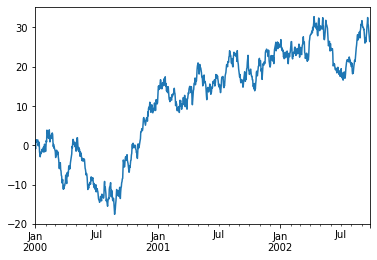

In [125]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.plot()

데이터프레임에서 plot()메소드는 라벨이 존재하는 모든 열을 그릴 때 편리합니다.

<Figure size 432x288 with 0 Axes>

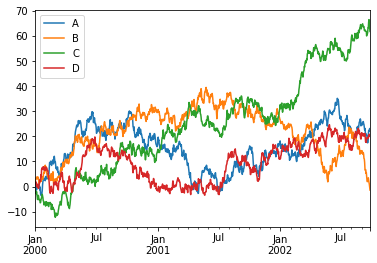

In [126]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])  
df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best')

12. Getting Data In/ Out (데이터입/출력)

CSV

csv 파일에 씁니다.

In [127]:
df.to_csv('foo.csv')

csv 파일을 읽습니다.

In [128]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.280353,1.296893,-1.097626,0.768056
1,2000-01-02,-1.089355,2.847020,-1.863945,1.719845
2,2000-01-03,-1.281490,2.852504,-2.745883,1.945448
3,2000-01-04,-0.139539,3.617231,-2.739149,0.906859
4,2000-01-05,-1.304498,3.649817,-1.981081,1.387088
...,...,...,...,...,...
995,2002-09-22,22.347220,2.491960,65.458653,20.122744
996,2002-09-23,21.936443,1.604322,66.379792,20.702678
997,2002-09-24,22.154637,0.961829,63.980942,20.804868
998,2002-09-25,23.114169,-0.047867,63.231008,20.532317


HDF

HDFStore에 읽고 씁니다.

HDF5 Store에 씁니다.

In [130]:
df.to_hdf('foo.h5','df')

HDF5 Store에서 읽어옵니다.

In [131]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.280353,1.296893,-1.097626,0.768056
2000-01-02,-1.089355,2.847020,-1.863945,1.719845
2000-01-03,-1.281490,2.852504,-2.745883,1.945448
2000-01-04,-0.139539,3.617231,-2.739149,0.906859
2000-01-05,-1.304498,3.649817,-1.981081,1.387088
...,...,...,...,...
2002-09-22,22.347220,2.491960,65.458653,20.122744
2002-09-23,21.936443,1.604322,66.379792,20.702678
2002-09-24,22.154637,0.961829,63.980942,20.804868
2002-09-25,23.114169,-0.047867,63.231008,20.532317


Excel

MS Excel에 읽고 씁니다.

엑셀 파일에 씁니다.

In [132]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

엑셀 파일을 읽어옵니다.

In [133]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.280353,1.296893,-1.097626,0.768056
1,2000-01-02,-1.089355,2.847020,-1.863945,1.719845
2,2000-01-03,-1.281490,2.852504,-2.745883,1.945448
3,2000-01-04,-0.139539,3.617231,-2.739149,0.906859
4,2000-01-05,-1.304498,3.649817,-1.981081,1.387088
...,...,...,...,...,...
995,2002-09-22,22.347220,2.491960,65.458653,20.122744
996,2002-09-23,21.936443,1.604322,66.379792,20.702678
997,2002-09-24,22.154637,0.961829,63.980942,20.804868
998,2002-09-25,23.114169,-0.047867,63.231008,20.532317


13. Gotchas (잡았다!)

연산 수행시 다음과 같은 예외 상황을 볼 수도 있습니다.

In [135]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: ignored

이러한 경우에는 any(),all(),empty 등을 사용해서 무엇을 원하는지를 선택(반영)해주어야 합니다.


In [ ]:
if pd.Series([False, True, False])is not None:
      print("I was not None")